In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, log_loss

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df1=pd.read_csv('Fake.csv')
df1

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
#inserting label column in dataset
df1.insert(4,"label",0)

In [4]:
df1

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [5]:
df2=pd.read_csv('True.csv')
df2

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
#inserting label column in dataset
df2.insert(4,"label",1)
df2

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
frames = [df1, df2]
  
df= pd.concat(frames)
display(df)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [9]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [10]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

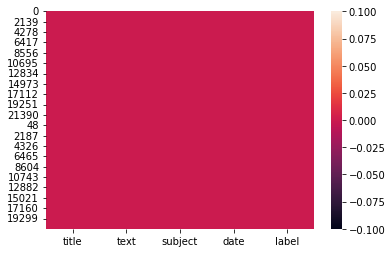

In [11]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

There is no missing values in dataset

0    23481
1    21417
Name: label, dtype: int64


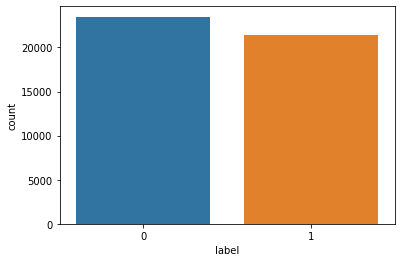

In [12]:
#Plotting the countplot for target variable
sns.countplot(x='label', data=df)
print(df['label'].value_counts())

targeted variable has two values.
0 stands for fake news and 1 stands for true news
fake news counts are 23481 which is more than true news with count 21417

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


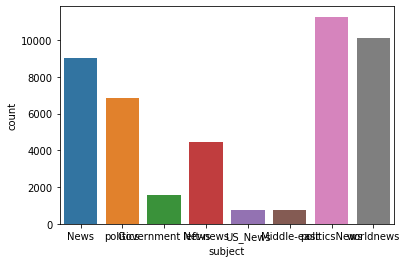

In [13]:
sns.countplot(x='subject', data=df)
print(df['subject'].value_counts())

maximum news subject is on politicsnews followed by worldnews and the least news is from subject USnews and middle-east

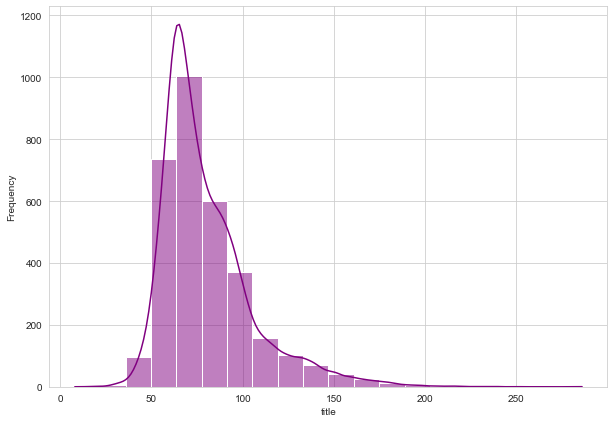

In [14]:
#Checking the distribution of title length using histplot
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
title_len = df.title.str.len()
sns.histplot(title_len, bins = 20, color = 'purple', stat = 'frequency', kde = True)

majority comments are between 65-75, where maximum length is 1000

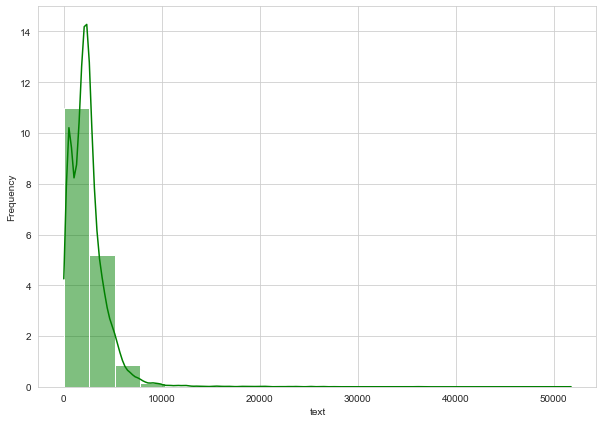

In [15]:
#Checking the distribution of text length using histplot
plt.figure(figsize=(10,7))
text_len = df.text.str.len()
sns.histplot(text_len, bins = 20, color = 'green', stat = 'frequency', kde = True)

maximum text is between 0-2000 and the maximum frequency is 11

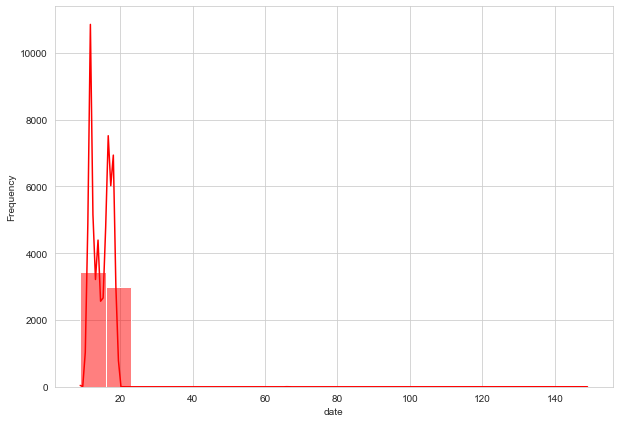

In [16]:
#Checking the distribution of date length using histplot
plt.figure(figsize=(10,7))
date_len = df.date.str.len()
sns.histplot(date_len, bins = 20, color = 'red', stat = 'frequency', kde = True)

most of the date is between 5-10, where frequency is 3000

In [17]:
#Creating new columns
df['length_title'] = df.title.str.len()
df['length_text'] = df.text.str.len()
df['length_date'] = df.date.str.len()
df.head()

,title,text,subject,date,label,length_title,length_text,length_date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,79,2893,17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,69,1898,17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,90,3597,17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,78,2774,17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,70,2346,17


In [18]:
#Converting the texts from the features in lowercase
df['title'] = df.title.str.lower()
df['text'] = df.text.str.lower()
df['date'] = df.date.str.lower()
df['subject'] = df.subject.str.lower()
df.head()

,title,text,subject,date,label,length_title,length_text,length_date
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,"december 31, 2017",0,79,2893,17
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,"december 31, 2017",0,69,1898,17
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,"december 30, 2017",0,90,3597,17
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,"december 29, 2017",0,78,2774,17
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,"december 25, 2017",0,70,2346,17


In [19]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [20]:
#Cleaning the data using regex operations 
#Function Definition
def clean_text(text):
    
    #Converting the text to lower case
    lowered_text = text.lower()
        
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing extra newline
    text = text.strip("\n")
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [21]:
#Applying the above custom function to the required features
df['title'] = df['title'].apply(lambda x: clean_text(x))
df['text'] = df['text'].apply(lambda x: clean_text(x))
df['date'] = df['date'].apply(lambda x: clean_text(x))

In [22]:
#Checking the feature after cleaning
df['title']

0        donald trump sends embarrassing new year eve m...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obama name coded website i...
4        pope francis called donald trump christmas speech
                               ...                        
21412    fully committed nato back new u approach afgha...
21413       lexisnexis withdrew two product chinese market
21414                 minsk cultural hub becomes authority
21415    vatican upbeat possibility pope francis visiti...
21416              indonesia buy billion worth russian jet
Name: title, Length: 44898, dtype: object

In [23]:
df['text']

0        donald trump wish american happy new year leav...
1        house intelligence committee chairman devin nu...
2        friday revealed former milwaukee sheriff david...
3        christmas day donald trump announced would bac...
4        pope francis used annual christmas day message...
                               ...                        
21412    brussels reuters nato ally tuesday welcomed pr...
21413    london reuters lexisnexis provider legal regul...
21414    minsk reuters shadow disused soviet era factor...
21415    moscow reuters vatican secretary state cardina...
21416    jakarta reuters indonesia buy sukhoi fighter j...
Name: text, Length: 44898, dtype: object

In [24]:
#Creating new features for checking the length after cleaning of these 3 columns
df['titlelen_after_cleaning'] = df['title'].map(lambda x: len(x))
df['textlen_after_cleaning'] = df['text'].map(lambda x: len(x))
df['datelen_after_cleaning'] = df['date'].map(lambda x: len(x))
df  #Checking the dataset after creating the features

,title,text,subject,date,label,length_title,length_text,length_date,titlelen_after_cleaning,textlen_after_cleaning,datelen_after_cleaning
0,donald trump sends embarrassing new year eve m...,donald trump wish american happy new year leav...,news,december,0,79,2893,17,63,1792,8
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,news,december,0,69,1898,17,68,1359,8
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,news,december,0,90,3597,17,70,2360,8
3,trump obsessed even obama name coded website i...,christmas day donald trump announced would bac...,news,december,0,78,2774,17,50,1831,8
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,news,december,0,70,2346,17,49,1423,8
...,...,...,...,...,...,...,...,...,...,...,...
21412,fully committed nato back new u approach afgha...,brussels reuters nato ally tuesday welcomed pr...,worldnews,august,1,61,2821,16,52,1924,6
21413,lexisnexis withdrew two product chinese market,london reuters lexisnexis provider legal regul...,worldnews,august,1,52,800,16,46,581,6
21414,minsk cultural hub becomes authority,minsk reuters shadow disused soviet era factor...,worldnews,august,1,49,1950,16,36,1301,6
21415,vatican upbeat possibility pope francis visiti...,moscow reuters vatican secretary state cardina...,worldnews,august,1,61,1199,16,55,837,6


In [25]:
#Checking the total length removed from the dataset for title column
print("Original Length:", df.length_title.sum(), '\n')
print("Cleaned Length:", df.titlelen_after_cleaning.sum(), '\n')
print("Total Words Removed:", (df.length_title.sum()) - (df.titlelen_after_cleaning.sum()))

Original Length: 3596856 

Cleaned Length: 2841064 

Total Words Removed: 755792


In [26]:
#Checking the total length removed from the dataset for text column
print("Original Length:", df.length_text.sum(), '\n')
print("Cleaned Length:", df.textlen_after_cleaning.sum(), '\n')
print("Total Words Removed:", (df.length_text.sum()) - (df.textlen_after_cleaning.sum()))

Original Length: 110858087 

Cleaned Length: 73036723 

Total Words Removed: 37821364


In [27]:
#Before separating features, we need to convert the object data into number vectors and it can be done by using TF-IDF vectorizer
tf_vec = TfidfVectorizer(max_features=15000)
features = tf_vec.fit_transform(df['title'] + df['text'] + df['date'] + df['subject'])
#We are adding these features as we need to convert all of them together

In [28]:
#Let's Separate the input and output variables represented by X and y respectively
x=features
y=df['label']

In [29]:
x

<44898x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 6550072 stored elements in Compressed Sparse Row format>

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
21412    1
21413    1
21414    1
21415    1
21416    1
Name: label, Length: 44898, dtype: int64

In [31]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [32]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [33]:
#Splitting the data using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9858203414996288


cross_val_score:  0.9742752539890777


roc_auc_score:  0.985944332294063


Log_loss : 0.4897550589402165


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7045
           1       0.98      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Confusion matrix: 

[[6927  118]
 [  73 6352]]




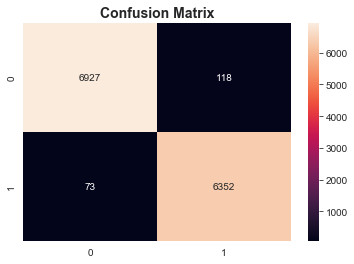

AUC_ROC curve:



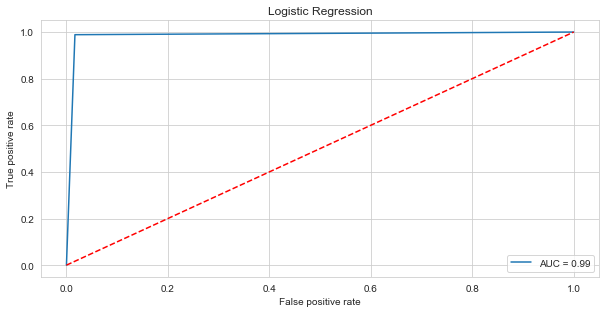





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9339272457312546


cross_val_score:  0.8980586327265476


roc_auc_score:  0.9339033947966519


Log_loss : 2.2820995104293442


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7045
           1       0.93      0.93      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



Confusion matrix: 

[[6583  462]
 [ 428 5997]]




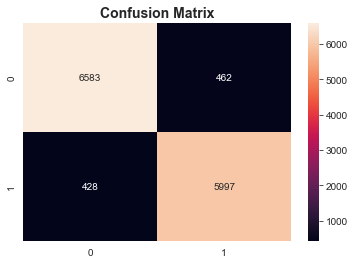

AUC_ROC curve:



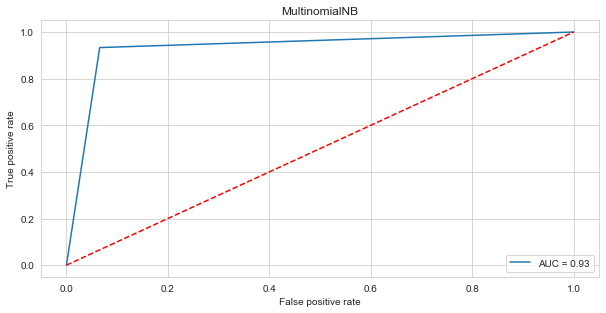





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9794357832219748


cross_val_score:  0.9749659450373068


roc_auc_score:  0.9792722713628066


Log_loss : 0.7102700677564459


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7045
           1       0.98      0.98      0.98      6425

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



Confusion matrix: 

[[6924  121]
 [ 156 6269]]




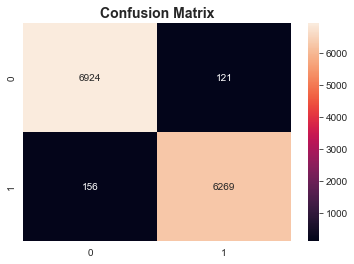

AUC_ROC curve:



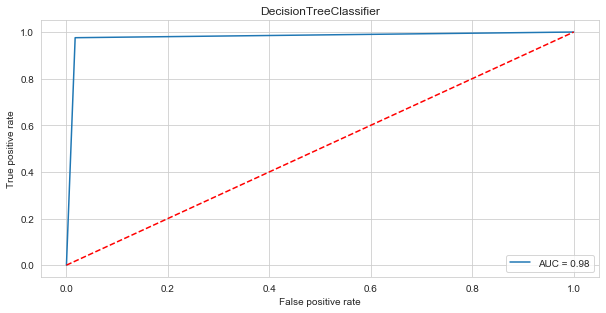





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9934669636228656


cross_val_score:  0.9885296178586461


roc_auc_score:  0.9934393959896496


Log_loss : 0.2256455757865049


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7045
           1       0.99      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Confusion matrix: 

[[7003   42]
 [  46 6379]]




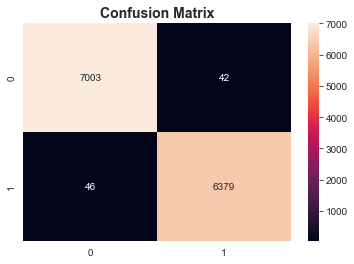

AUC_ROC curve:



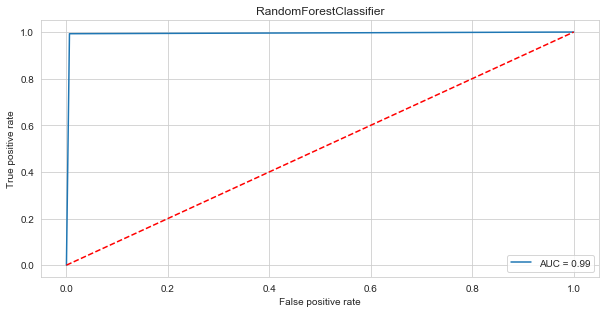





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.9883444691907943


cross_val_score:  0.9826052771983923


roc_auc_score:  0.988220417383524


Log_loss : 0.402571571509764


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7045
           1       0.99      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Confusion matrix: 

[[6981   64]
 [  93 6332]]




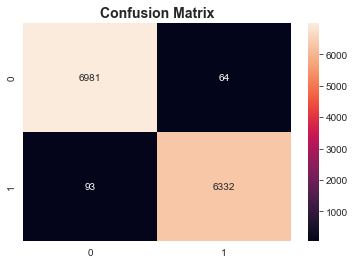

AUC_ROC curve:



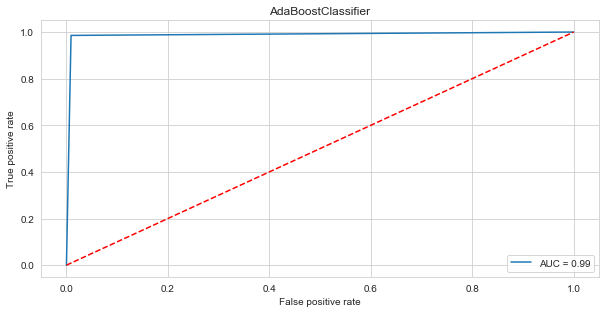





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9867112100965107


cross_val_score:  0.9805340498778268


roc_auc_score:  0.9863439865456364


Log_loss : 0.45898091748969805


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7045
           1       0.99      0.98      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Confusion matrix: 

[[7005   40]
 [ 139 6286]]




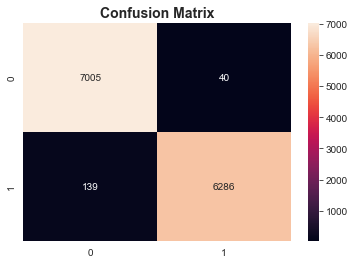

AUC_ROC curve:



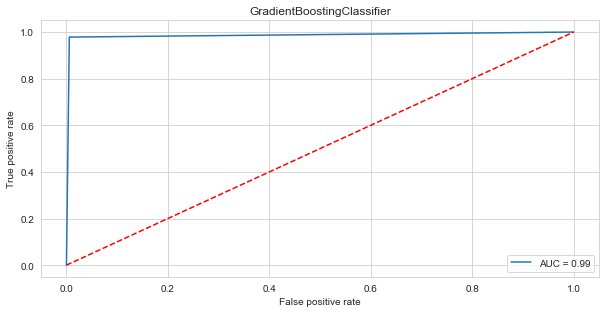

In [34]:
Model=[]
score=[]
cvs=[]
rocscore=[]
l_loss=[]
precision=[]
recall=[]
f1score=[]    #Empty lists

for name,model in models:
    #Fitting the model 
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    print(model)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print('\n')
    
    #Accuracy score
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    
    #Cross-validation score
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    
    #Calculating roc_auc score
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    #Calculating log loss
    try: 
        loss=log_loss(y_test, pre)
    except:
        loss=log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    
    #Calculating classification report
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    
    #Appending precision, recall and f1_score to the list
    precision.append(precision_score(y_test,pre))
    recall.append(recall_score(y_test,pre))
    f1score.append(f1_score(y_test,pre))
    print('\n')
    
    #Calculating confusion matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    
    #Plotting the confusion matrix using heatmap
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix', size=14, weight='bold', loc='center')
    plt.show()
    
    #Plotting AUC_ROC curve
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [35]:
#Printing the results in a dataFrame
results = pd.DataFrame({"Model" : Model,
                        'accuracy_score' : score,
                        'cross_validation_score' : cvs,
                        'log_loss': l_loss,
                        'AUC_ROC Score' : rocscore,
                        'Precision' : precision,
                        'Recall' : recall,
                        'f1_score' : f1score
                        })
results

,Model,accuracy_score,cross_validation_score,log_loss,AUC_ROC Score,Precision,Recall,f1_score
0,Logistic Regression,98.582034,97.427525,0.489755,98.594433,0.981762,0.988638,0.985188
1,MultinomialNB,93.392725,89.805863,2.282100,93.390339,0.928472,0.933385,0.930922
2,DecisionTreeClassifier,97.943578,97.496595,0.710270,97.927227,0.981064,0.975720,0.978385
3,RandomForestClassifier,99.346696,98.852962,0.225646,99.343940,0.993459,0.992840,0.993150
4,AdaBoostClassifier,98.834447,98.260528,0.402572,98.822042,0.989994,0.985525,0.987754
5,GradientBoostingClassifier,98.671121,98.053405,0.458981,98.634399,0.993677,0.978366,0.985962


selcting logistic regression as the model is performing well as compared to other models.

In [36]:
#hyperparameter tuning
#logistic regression

#Parameters list to pass in GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[10, 1, 0.1, 0.01,0.001,0.001]}

In [37]:
#Using GridSearchCV to run the parameters and checking final accuracy
LR=LogisticRegression()
grid=GridSearchCV(LR,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_) 

{'C': 10, 'penalty': 'l2'}
0.9903588203863013


In [38]:
LR=LogisticRegression(C=10,penalty='l2')
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
loss = log_loss(y_test, pre)
print("Log loss:", loss)
print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

Accuracy score:  98.67112100965107
Cross validation score:  98.37410800901185
roc_auc_score:  0.9863439865456364
Log loss: 0.45898091748969805
Classification report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7045
           1       0.99      0.98      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

Confusion matrix: 

[[7005   40]
 [ 139 6286]]


In [42]:
#finializing model
lr_prediction=LR.predict(x)
print('Predictions of Logistic Regression: ',lr_prediction)

Predictions of Logistic Regression:  [0 0 0 ... 1 1 1]


In [47]:
#saving the best model
import pickle
filename='fakenewspredict.pkl'
pickle.dump(LR, open(filename, 'wb'))
#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [48]:
#conclusion
result=loaded_model.score(x_test,y_test)
print(result*100)

99.21306607275426


final model score is 99%